# Techniques for Solving a Multi-Label Classification Problem
# 1)Problem Transformation Method
# 2)Adapted Algorithm Method
# 3)Ensemble Approaches

# Problem Transformation Method

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("dataset-tags.csv")

In [3]:
df.head()

,title,tags,mysql,python,php
0,Flask-SQLAlchemy - When are the tables/databas...,"['python', 'mysql']",1,1.0,0.0
1,Combining two PHP variables for MySQL query,"['php', 'mysql']",1,0.0,1.0
2,'Counting' the number of records that match a ...,"['php', 'mysql']",1,0.0,1.0
3,Insert new row in a table and auto id number. ...,"['php', 'mysql']",1,0.0,1.0
4,Create Multiple MySQL tables using PHP,"['php', 'mysql']",1,0.0,1.0


In [4]:
df.dtypes

title      object
tags       object
mysql       int64
python    float64
php       float64
dtype: object

In [5]:
df['mysql'] = df['mysql'].astype(float)

In [6]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

In [8]:
import neattext as nt
import neattext.functions as nfx

In [9]:
df['title'].apply(lambda x:nt.TextFrame(x).noise_scan())

0      {'text_noise': 11.267605633802818, 'text_lengt...
1      {'text_noise': 4.651162790697675, 'text_length...
2      {'text_noise': 9.90990990990991, 'text_length'...
3      {'text_noise': 8.47457627118644, 'text_length'...
4      {'text_noise': 2.631578947368421, 'text_length...
                             ...                        
139    {'text_noise': 26.41509433962264, 'text_length...
140    {'text_noise': 3.8461538461538463, 'text_lengt...
141    {'text_noise': 6.666666666666667, 'text_length...
142    {'text_noise': 13.636363636363635, 'text_lengt...
143    {'text_noise': 7.142857142857142, 'text_length...
Name: title, Length: 144, dtype: object

In [10]:
df.shape

(144, 5)

In [11]:
df['title'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())

0                                [when, are, the, and]
1                                           [two, for]
2                    [the, of, that, a, and, the, and]
3                                    [in, a, and, and]
4                                              [using]
                            ...                       
139                                 [where, in, using]
140                                               [to]
141                                  [and, get, using]
142    [how, to, the, of, a, with, a, back, into, the]
143                                           [in, if]
Name: title, Length: 144, dtype: object

In [12]:
df['title'].apply(nfx.remove_stopwords)

0      Flask-SQLAlchemy - tables/databases created de...
1                    Combining PHP variables MySQL query
2      'Counting' number records match certain criter...
3         Insert new row table auto id number. Php MySQL
4                       Create Multiple MySQL tables PHP
                             ...                        
139               Executing "SELECT ... ... ..." MySQLdb
140                              SQLAlchemy reconnect db
141                      mysql Count Distinct result php
142    store result radio button database value, data...
143                 Use SQL count result statement - PHP
Name: title, Length: 144, dtype: object

In [13]:
corpus = df['title'].apply(nfx.remove_stopwords)

In [14]:
tfidf = TfidfVectorizer()

In [15]:
Xfeatures = tfidf.fit_transform(corpus).toarray()

In [16]:
Xfeatures

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
y = df[['mysql', 'python', 'php']]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(Xfeatures,y,test_size=0.3,random_state=42)

# 1)Problem Transformation Method

In [19]:
#Binary relevance technique

In [20]:
binary_rel_clf = BinaryRelevance(MultinomialNB())

In [21]:
binary_rel_clf.fit(X_train,y_train)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [22]:
br_prediction = binary_rel_clf.predict(X_test)

In [23]:
br_prediction.toarray()

array([[1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.]])

In [24]:
accuracy_score(y_test,br_prediction)

0.9090909090909091

In [25]:
hamming_loss(y_test,br_prediction)

0.06060606060606061

In [26]:
#Classifier chains technique

In [27]:
def build_model(model,mlb_estimator,xtrain,ytrain,xtest,ytest):
    clf = mlb_estimator(model)
    clf.fit(xtrain,ytrain)
    clf_predictions = clf.predict(xtest)
    acc = accuracy_score(ytest,clf_predictions)
    ham = hamming_loss(ytest,clf_predictions)
    result = {"accuracy:":acc,"hamming_score":ham}
    return result

In [28]:
clf_chain_model = build_model(MultinomialNB(),ClassifierChain,X_train,y_train,X_test,y_test)

In [29]:
clf_chain_model

{'accuracy:': 0.8409090909090909, 'hamming_score': 0.10606060606060606}

In [30]:
#Labelpowerset technique

In [31]:
lf_labelP_model = build_model(MultinomialNB(),LabelPowerset,X_train,y_train,X_test,y_test)

In [32]:
lf_labelP_model

{'accuracy:': 0.9090909090909091, 'hamming_score': 0.06060606060606061}

In [33]:
#Making a single prediction

In [34]:
ex1 = df['title'].iloc[0]

In [35]:
vec_example = tfidf.transform([ex1])

In [36]:
binary_rel_clf.predict(vec_example).toarray()

array([[1., 1., 0.]])

# 2)Adapted Algorithm Method

In [38]:
from scipy import sparse
import gc

f = open(r'/home/reenal/personal/multiclass_multilable_claffication/Mediamill_data.txt',
'r',encoding='utf-8')
#f = open(r'C:\Users\kaoyuant\Downloads\Mediamill\Mediamill_data.txt',
#         'r',encoding='utf-8')

size = f.readline()
nrows, nfeature,nlabel = [int(s) for s in size.split()]
x_m = [[] for i in range(nrows)]
pos = [[] for i in range(nrows)]
y_m = [[] for i in range(nrows)]

for i in range(nrows):
    line = f.readline()
    temp=[s for s in line.split(sep=' ')]
    pos[i]=[int(s.split(':')[0]) for s in temp[1:]]
    x_m[i]=[float(s.split(':')[1]) for s in temp[1:]]
    for s in temp[0].split(','):
        try:
            int(s)
            y_m[i]=[ int(s) for s in temp[0].split(',')]
        except:
            y_m[i]=[]




f = open(r'/home/reenal/personal/multiclass_multilable_claffication/mediamill_trSplit.txt',
'r',encoding='utf-8')

train=f.readlines()

f = open(r'/home/reenal/personal/multiclass_multilable_claffication/mediamill_tstSplit.txt',
'r',encoding='utf-8')

test=f.readlines()


select=0
train_=[int(s.split()[select])-1 for s in train]
test_=[int(s.split()[select])-1 for s in test]

xm_train=[x_m[i] for i in train_]
ym_train=[y_m[i] for i in train_]

xm_test=[x_m[i] for i in test_]
ym_test=[y_m[i] for i in test_]



x_train=sparse.lil_matrix((len(train_),nfeature))
for i in range(len(train_)):
    for j in range(len(pos[i])):
        x_train[i,pos[i][j]]=xm_train[i][j]

x_test=sparse.lil_matrix((len(test_),nfeature))
for i in range(len(test_)):
    for j in range(len(pos[i])):
        x_test[i,pos[i][j]]=xm_test[i][j]

del x_m, xm_train, pos,xm_test
gc.collect()

y_train=sparse.lil_matrix((len(train_),nlabel))
for i in range(len(train_)):
    for j in ym_train[i]:
        y_train[i,j]=1

y_test=sparse.lil_matrix((len(test_),nlabel))
for i in range(len(test_)):
    for j in ym_test[i]:
        y_test[i,j]=1

del y_m, ym_train, ym_test
gc.collect()  

0

In [ ]:
Label Graph
When the label space is large, we can try to explore it using graph methods. Each label is a node in the graph and an edge exists when labels co-occur,
weighted by the frequency of co-occurrence.

In [39]:
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
graph_builder = LabelCooccurrenceGraphBuilder(weighted=True,
                                              include_self_edges=False)

label_names=[i for i in range(nlabel)]
edge_map = graph_builder.transform(y_train)
print("{} labels, {} edges".format(len(label_names), len(edge_map)))


101 labels, 2213 edges


In [42]:
#from skmultilearn.cluster import NetworkXLabelGraphClusterer
from skmultilearn.cluster.networkx import NetworkXLabelGraphClusterer

# we define a helper function for visualization purposes
def to_membership_vector(partition):
    return {
        member :  partition_id
        for partition_id, members in enumerate(partition)
        for member in members
    }
clusterer = NetworkXLabelGraphClusterer(graph_builder, method='louvain')


In [43]:
partition = clusterer.fit_predict(x_train,y_train)
membership_vector = to_membership_vector(partition)
print('There are', len(partition),'clusters')

There are 3 clusters


/home/reenal/anaconda3/envs/multilable/lib/python3.9/site-packages/skmultilearn/cluster/networkx.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(


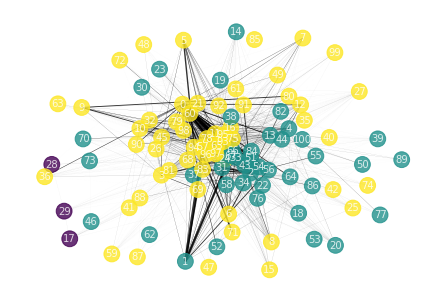

In [44]:
import networkx as nx
names_dict = dict(enumerate(x for x in label_names))
import matplotlib.pyplot as plt
%matplotlib inline
nx.draw(
    clusterer.graph_,
    pos=nx.spring_layout(clusterer.graph_,k=4),
    labels=names_dict,
    with_labels = True,
    width = [10*x/y_train.shape[0] for x in clusterer.weights_['weight']],
    node_color = [membership_vector[i] for i in range(y_train.shape[1])],
    cmap=plt.cm.viridis,
    node_size=250,
    font_size=10,
    font_color='white',
    alpha=0.8
)

In [45]:
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV
import time

parameters = {'k': range(1,3), 's': [0.5, 0.7, 1.0]}
score = 'f1_micro'

start=time.time()

classifier = GridSearchCV(MLkNN(), parameters, scoring=score)
classifier.fit(x_train, y_train)

print('training time taken: ',round(time.time()-start,0),'seconds')
print('best parameters :', classifier.best_params_, 'best score: ',
      clf.best_score_)

/home/reenal/anaconda3/envs/multilable/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/reenal/anaconda3/envs/multilable/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/reenal/anaconda3/envs/multilable/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/reenal/anaconda3/envs/multilable/lib/python3.9/site-

/home/reenal/anaconda3/envs/multilable/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/reenal/anaconda3/envs/multilable/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/reenal/anaconda3/envs/multilable/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/reenal/anaconda3/envs/multilable/lib/python3.9/site-

training time taken:  8596.0 seconds


NameError: name 'clf' is not defined

In [46]:
print('best parameters :', classifier.best_params_,
      'best score: ',classifier.best_score_)

best parameters : {'k': 1, 's': 0.5} best score:  0.6091114319422588


In [ ]:
#Algorithm Adaptation - BRkNNaClassifier

In [47]:
from skmultilearn.adapt import BRkNNaClassifier

parameters = {'k': range(3,5)}
score = 'f1_micro'

start=time.time()

classifier = GridSearchCV(BRkNNaClassifier(), parameters, scoring=score)
classifier.fit(x_train, y_train)

print('training time taken: ',round(time.time()-start,0),'seconds')
print('best parameters :', classifier.best_params_,
      'best score: ',classifier.best_score_)


/home/reenal/anaconda3/envs/multilable/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/reenal/anaconda3/envs/multilable/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/reenal/anaconda3/envs/multilable/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/reenal/anaconda3/envs/multilable/lib/python3.9/site-

training time taken:  371.0 seconds
best parameters : {'k': 3} best score:  0.6117931106531971


/home/reenal/anaconda3/envs/multilable/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
